In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
import seaborn as sns

In [3]:
# Load the data
train_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [4]:
# Split off labels
X_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values
X_test = test_df.drop(columns=['label']).values
y_test = test_df['label'].values

# Reshape and normalize
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 26)
y_test = to_categorical(y_test, 26)

In [5]:
# Splitting data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

Train shape: (21964, 28, 28, 1), (21964, 26)
Validation shape: (5491, 28, 28, 1), (5491, 26)
Test shape: (7172, 28, 28, 1), (7172, 26)


In [6]:
baseline_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax') 
])

baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the baseline model
baseline_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the baseline model
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(X_test, y_test)
print(f"Baseline Test Accuracy: {baseline_test_acc:.4f}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1944 - loss: 2.8029 - val_accuracy: 0.4903 - val_loss: 1.8299
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5429 - loss: 1.6268 - val_accuracy: 0.6183 - val_loss: 1.3311
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6574 - loss: 1.2253 - val_accuracy: 0.6576 - val_loss: 1.0881
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7132 - loss: 1.0019 - val_accuracy: 0.6875 - val_loss: 1.0195
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7514 - loss: 0.8742 - val_accuracy: 0.7474 - val_loss: 0.8729
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7935 - loss: 0.7525 - val_accuracy: 0.7968 - val_loss: 0.7157
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8263 - loss: 0.6494 - val_accuracy: 0.7988 - val_loss: 0.6847
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8412 - loss: 0.5880 - val_accuracy: 0.

In [7]:
model = models.Sequential([
    # 3 Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten layer converts back to 1D
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),  # Added dropout layer for increased accuracy
    layers.Dense(26, activation='softmax') # Output
])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,538 (439.60 KB)

 Trainable params: 112,538 (439.60 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile and train the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.1667 - loss: 2.7600 - val_accuracy: 0.6474 - val_loss: 1.0261
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7291 - loss: 0.7921 - val_accuracy: 0.8742 - val_loss: 0.3721
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8792 - loss: 0.3548 - val_accuracy: 0.9716 - val_loss: 0.1206
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9427 - loss: 0.1784 - val_accuracy: 0.9933 - val_loss: 0.0487
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9767 - loss: 0.0821 - val_accuracy: 0.9975 - val_loss: 0.0222
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9861 - loss: 0.0562 - val_accuracy: 0.9984 - val_loss: 0.0168
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9915 - loss: 0.0341 - val_accuracy: 0.9984 - val_loss: 0.0085
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9936 - loss: 0.0269 - 

In [9]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8833 - loss: 0.4474
Test accuracy: 0.8805


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


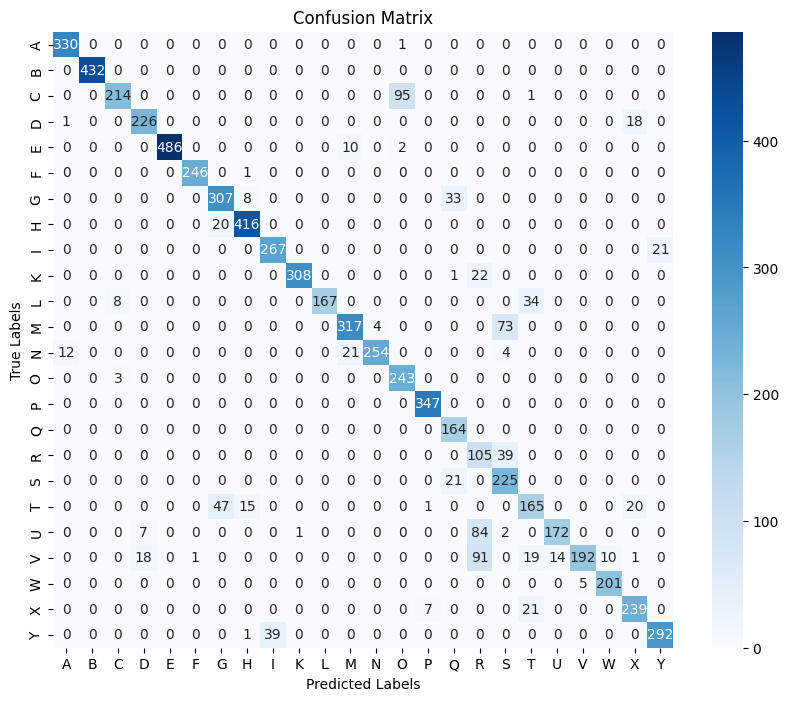

In [10]:
# Confusion Matrix
# Accounting for lack of J and Z
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()